# A simple Keras classifier #
Generate a Gaussian distribution of points in the (X,Y) plane, assign points with x>0 to group 0 and x<0 to group 1. Then generate a model which recapitulates the groupings.

In [1]:
import random
import math
import numpy as np

In [3]:
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
from keras.layers import Dense, Activation

In [5]:
from keras.utils.vis_utils import plot_model

## Generate the random points ##
This is a basic Box-Muller

In [6]:
num_points=5000
num_fit = 5000
point_data = []
group_data = []
for i in range(num_points):
  mag = math.sqrt(-2*math.log(random.random()))
  phase = 2*math.pi*random.random()
  point_data.append([mag*math.cos(phase),mag*math.sin(phase)]);
  if math.cos(phase)>0:
    group_data.append([1,0])
  else:
    group_data.append([0,1])

groups = np.array(group_data)
points = np.array(point_data)

A simple 2 layer model. The matrix of the first step really should just project along the X axis; the second should multiply by a big number.

In [7]:
model = Sequential()
model.add(Dense(2,activation='softmax',input_shape=(2,)))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='rmsprop',loss='mse')

model.fit(points[0:num_fit],groups[0:num_fit],epochs=50, batch_size=100,verbose=False)

group_pred = model.predict(points)


W0906 14:47:19.321539 139822758455104 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 14:47:19.342574 139822758455104 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 14:47:19.345268 139822758455104 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 14:47:19.377442 139822758455104 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 14:47:19.517562 139822758455104 de

In [8]:
num_right = 0
num_wrong = 0
for i in range(num_points):
    if np.argmax(group_pred[i])==np.argmax(groups[i]):
        num_right = num_right + 1
    else:
        num_wrong = num_wrong + 1
        
print ('There are '+str(num_right)+' correctly classifield points and '+
       str(num_wrong)+' wrong.')


There are 4992 correctly classifield points and 8 wrong.


In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

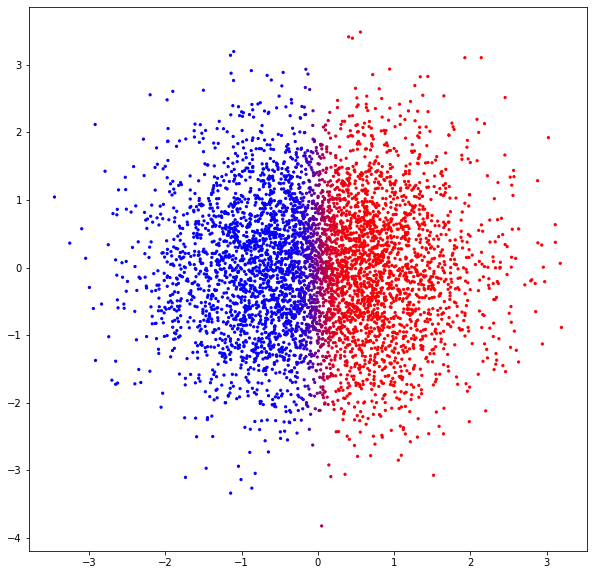

In [10]:
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(points[:,0],points[:,1],s=5,
            c=np.transpose(np.array([group_pred[:,0],0*group_pred[:,0],group_pred[:,1]])))

In [11]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 2,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 2,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros'

In [12]:
model.get_layer(name=model.get_config()[0]['config']['name']).get_weights()

KeyError: 0

In [13]:
model.get_layer(name=model.get_config()[1]['config']['name']).get_weights()

KeyError: 1

In [14]:
model.predict(np.array([[-1,0]]))

array([[0.01651588, 0.9834841 ]], dtype=float32)

In [15]:
model.predict(np.array([[1,10]]))

array([[0.9837338 , 0.01626616]], dtype=float32)

In [16]:
model.get_layer(name=model.get_config()[0]['config']['name']).get_weights()[0]

KeyError: 0